In [143]:
import csv
import sqlite3

from matplotlib import pyplot as plt
import pandas as pd

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [95]:
query = """
SELECT
    r_order.*,
    r_orderitem.quantity,
    r_product.*
FROM restaurant_order as r_order
JOIN restaurant_orderitem as r_orderitem on r_order.id = r_orderitem.order_id
JOIN restaurant_product as r_product on r_product.id = r_orderitem.product_id
"""

with sqlite3.connect("../db.sqlite3") as connection:
    data = connection.execute(query).fetchall()

with open("../restaurant.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerow(["order_id", "datetime", "quantity", "product_id", "price", "name"])
    writer.writerows(data)

restaurant = pd.read_csv("../restaurant.csv", parse_dates=["datetime"])
restaurant.head()

,order_id,datetime,quantity,product_id,price,name
0,1,2019-08-03 20:25:00,2,6,0.80,Plain Papadum
1,1,2019-08-03 20:25:00,1,240,12.95,King Prawn Balti
2,1,2019-08-03 20:25:00,1,19,2.95,Garlic Naan
3,1,2019-08-03 20:25:00,1,36,3.95,Mushroom Rice
4,1,2019-08-03 20:25:00,1,111,8.95,Paneer Tikka Masala


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

<Axes: title={'center': 'Top 10 positions in menu by quantity'}>

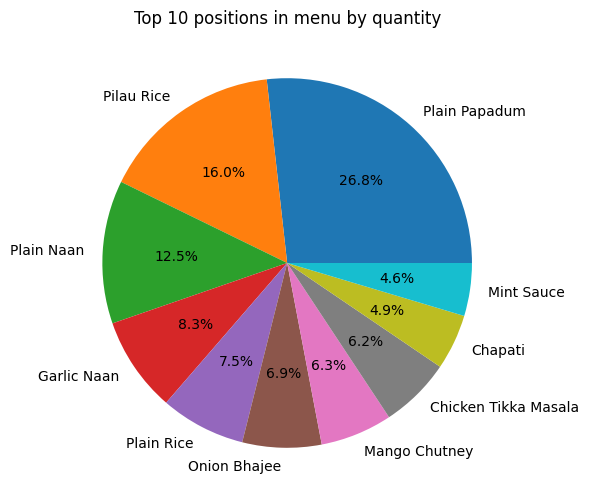

In [81]:
top_10 = restaurant.groupby("name")["quantity"].sum().sort_values(ascending=False)[:10]
top_10.plot.pie(
    figsize=(6, 6),
    autopct="%1.1f%%", 
    title="Top 10 positions in menu by quantity",
    ylabel=""
)

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

<Axes: title={'center': 'Top 10 most profitable positions in menu'}>

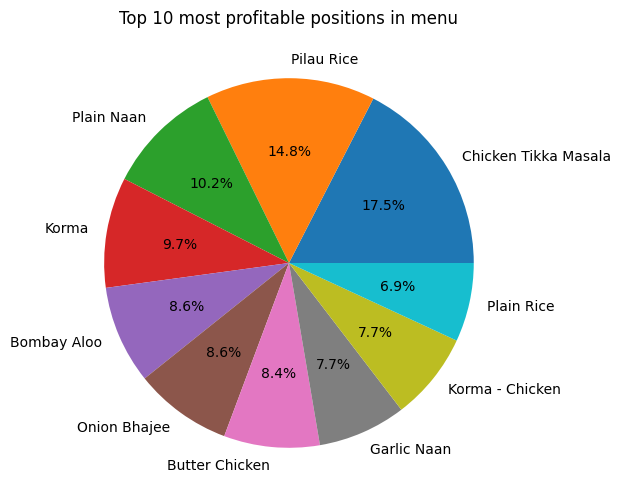

In [87]:
restaurant["Item Price"] = restaurant["price"] * restaurant["quantity"]

top_10 = restaurant.groupby("name")["Item Price"].sum().sort_values(ascending=False)[:10]
top_10.plot.pie(
    figsize=(6, 6),
    autopct="%1.1f%%", 
    title="Top 10 most profitable positions in menu",
    ylabel=""
)

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<Axes: title={'center': 'Profit by Order Hour'}, xlabel='Order Hour'>

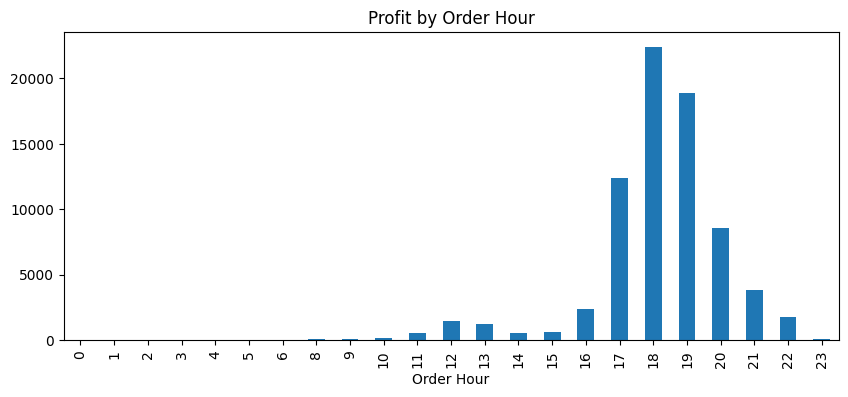

In [129]:
restaurant["Order Hour"] = restaurant["datetime"].dt.hour

restaurant.groupby("Order Hour")["order_id"].count().plot.bar(figsize=(10, 4), title="Profit by Order Hour")

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

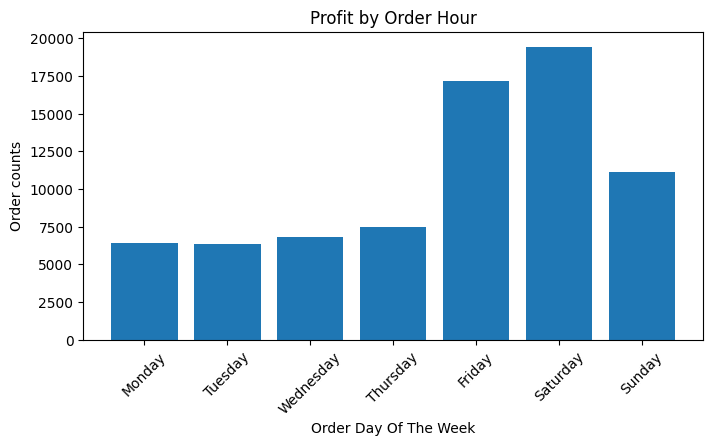

In [184]:
restaurant["Order Day Of The Week"] = restaurant["datetime"].dt.day_name()

cats = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
result = restaurant.groupby("Order Day Of The Week")["order_id"].count().reindex(cats)

plt.figure(figsize=(8, 4))
plt.bar(result.index, result, width=0.8)
plt.title("Profit by Order Hour")
plt.xlabel("Order Day Of The Week")
plt.ylabel("Order counts")
plt.xticks(rotation=45)
plt.show()